# Interesting Papers

## [Concurrent Validity of the Inertial Measurement Unit Vmaxpro in Vertical Jump Estimation](https://drive.google.com/file/d/1HZJW63OYvIvuNShxYTbhHy2ENA2rS4FG/view?usp=sharing)
### Section: 2.3.2. Inertial Measurement Unit Vmaxpro

Formula:

VJH = (vo^2) / (2 * g)
vo .-  is the take-off velocity, registered as the maximum velocity recorded by Vmaxpro.
g .-  is the acceleration of gravity (9.81 m/s2).

But, the article did not explain how to compute vo, just said that is considered as the maximum velocity recorded by the Vmaxpro device.

## [IMU-Based Real-Time Jump Height Estimation with DSP and Chip Implementation](https://drive.google.com/file/d/1d44Sp6x8fSNZBlcb-fj3yofDLoKP0syq/view?usp=sharing)
### Section 3: Algorithm

They criticised the velocity base solution because methods which uses the instantaneous speed of the jump, but the accuracy is low because of the accumulation of errors during the integration.

Formula:
h = (1/2) * g *(t/2)^2
t .- flight time
g .- acceleration of gravity (9.81 m/s2)

1. Filtering the Vertical Axis Acceleration: The vertical axis acceleration is passed through a moving average filter. This helps in reducing noise and avoiding early detection of take-off and touch-down instants.

2. Detecting Take-Off and Touch-Down Instants: The algorithm looks for instants when the filtered vertical axis acceleration value is greater than a predefined threshold. These instants are considered as the moments of take-off and touch-down.

3. Adjusting Take-Off and Touch-Down Points: After finding the initial instants, they correspond to the unfiltered vertical axis acceleration to adjust the take-off and touch-down points. This step ensures accuracy by avoiding the possibility of the feature being filtered out after the moving average filter.

4. Calculating Flight Time: Finally, the flight time is determined as the time interval between the take-off and touch-down instants. This flight time is then used in equation (5) to calculate the jump height

## [Estimation of Vertical Jump Height Based on IMU Sensor](https://drive.google.com/file/d/1xJrYkVFFNG_b4rCgQec3JNL25gRjUIvN/view?usp=sharing)
### Section 3: Data Processing

Formula:
h = (1/2) * g *(t/2)^2
t .- flight time
g .- acceleration of gravity (9.81 m/s2)

The article apply a Moving Average Filter to Preprocessing. The calculation method of flight time involves traversing the data in reverse time order from a specific time point (t1). The flight time is counted when the value of the adjusted acceleration (a) is less than the gravitational acceleration (g). When (a) becomes greater than g, the counting of flight time ends, indicating that the subject is at the initial time before takeoff. This calculation flow of flight time (t) is depicted in Figure 3 of the paper.

## [System Based on an Inertial Measurement Unit for Accurate Flight Time Determination in Vertical Jumps](https://drive.google.com/file/d/1M29OdUfoVTFn3LsW2prAQmNOrlOcKG-s/view?usp=sharing)
### Section 2.2 Flight Time and Jump Height Determination Algorithm

Formula:
h = (1/2) * g *(t/2)^2
t .- flight time
g .- acceleration of gravity (9.81 m/s2)

The figure 4 explains how to identify the floght time


# Implementations

VJH = (vo^2) / (2 * g)
vo .-  is the take-off velocity, registered as the maximum velocity recorded by Vmaxpro.
g .-  is the acceleration of gravity (9.81 m/s2).

Butterworth filter sometimes is used to smooth vertical acceleration data [Paper](https://ieeexplore.ieee.org/document/6091947)

[Jump IMU Dataset Example](https://github.com/Rfathian/IMU-Countermovement-Jump/tree/master/Dataset)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy.signal import butter, filtfilt

In [52]:
# Load your data here
# df = pd.read_csv('your_data.csv', index_col='timeseries')
df = pd.read_excel("TJump07.xlsx")

# Assuming a 100 Hz sampling rate
sampling_rate = 100  # in Hz
sampling_interval = 1 / sampling_rate  # in seconds

# Creating a datetime index starting from a reference time (e.g., 2024-01-01 00:00:00)
# and with intervals according to the sampling rate
reference_time = pd.Timestamp('1970-01-01 00:00:00')
time_index = pd.date_range(start=reference_time, periods=len(df), freq=pd.DateOffset(seconds=sampling_interval))

# Assign this new datetime index to the dataframe
df.index = time_index

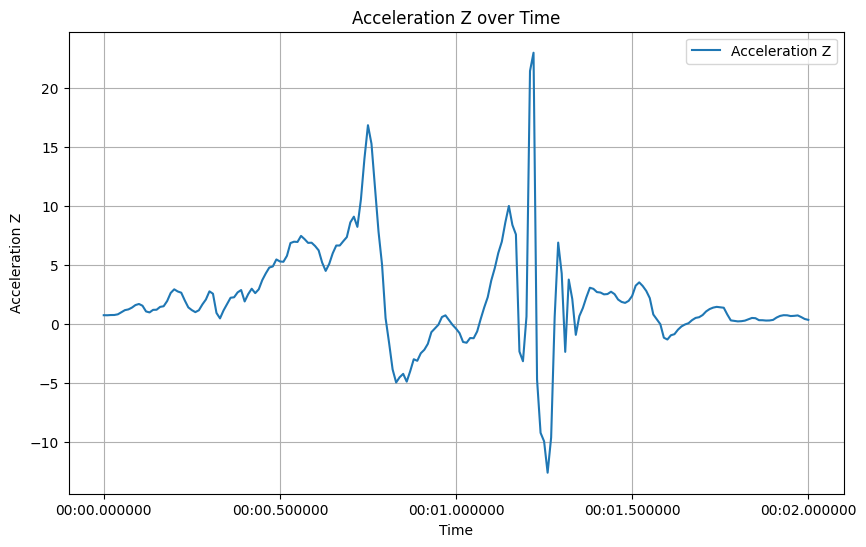

In [53]:
# Plotting the 'accZ' column as a line graph
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.plot(df['accZ'], label='Acceleration Z')
plt.title('Acceleration Z over Time')
plt.xlabel('Time')
plt.ylabel('Acceleration Z')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [54]:
# Constants
g = 9.81  # Acceleration due to gravity in m/s^2

# Extracting the vertical acceleration (assuming accZ)
vertical_acc = df['accZ'].values

# Integrating the acceleration to get velocity
# Since our data now has a datetime index with a 100 Hz sampling rate, each step is 0.01 seconds
vertical_velocity = cumtrapz(vertical_acc, dx=0.01, initial=0)

# Finding the maximum velocity for take-off velocity (v0)
v0 = vertical_velocity.max()

# Calculating the Vertical Jump Height (VJH)
VJH = (v0 ** 2) / (2 * g)

v0, VJH

(4.24218078, 0.917232302252875)

In [55]:
# Designing a Butterworth low-pass filter
# Choosing an appropriate cut-off frequency and filter order
# These values can be adjusted based on the characteristics of the data and the desired level of smoothing
cutoff_frequency = 10  # Cut-off frequency in Hz
filter_order = 3       # Filter order

# The Nyquist frequency is half the sampling rate
nyquist_frequency = 0.5 * sampling_rate

# Normalizing the cut-off frequency with respect to the Nyquist frequency
normalized_cutoff = cutoff_frequency / nyquist_frequency

# Designing the Butterworth filter
b, a = butter(N=filter_order, Wn=normalized_cutoff, btype='low', analog=False)

# Applying the filter to the vertical acceleration data
filtered_acc = filtfilt(b, a, vertical_acc)

# Integrating the filtered acceleration to get velocity
filtered_velocity = cumtrapz(filtered_acc, dx=0.01, initial=0)

# Finding the maximum velocity in the filtered data for take-off velocity (v0)
v0_filtered = filtered_velocity.max()

# Calculating the Vertical Jump Height (VJH) using the filtered data
VJH_filtered = (v0_filtered ** 2) / (2 * g)

v0_filtered, VJH_filtered

(4.242764004648437, 0.9174845259500737)